# House Price Advanced Regression Techniques
* This is prepared for kaggle House Price Advanced Regression Techniques competition. I  used Tensorflow Decision Forest to analyze this dataset and create a ML model. Before start this competition , I researched about different regression techniques and decided using TFDF.

In [ ]:
!pip install kaggle

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 47.8 MB/s eta 0:00:00


In [41]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv


{'sample_submission.csv': b'Id,SalePrice\n1461,169277.0524984\n1462,187758.393988768\n1463,183583.683569555\n1464,179317.47751083\n1465,150730.079976501\n1466,177150.989247307\n1467,172070.659229164\n1468,175110.956519547\n1469,162011.698831665\n1470,160726.247831419\n1471,157933.279456005\n1472,145291.245020389\n1473,159672.017631819\n1474,164167.518301885\n1475,150891.638244053\n1476,179460.96518734\n1477,185034.62891405\n1478,182352.192644656\n1479,183053.458213802\n1480,187823.339254278\n1481,186544.114327568\n1482,158230.77520516\n1483,190552.829321091\n1484,147183.67487199\n1485,185855.300905493\n1486,174350.470676986\n1487,201740.620690863\n1488,162986.378895754\n1489,162330.199085679\n1490,165845.938616539\n1491,180929.622876974\n1492,163481.501519718\n1493,187798.076714233\n1494,198822.198942566\n1495,194868.409899858\n1496,152605.298564403\n1497,147797.702836811\n1498,150521.96899297\n1499,146991.630153739\n1500,150306.307814534\n1501,151164.372534604\n1502,151133.706960953\n

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TEnsorflow DEcision Forests v"+ tfdf.__version__)

TensorFlow v2.12.0
TEnsorflow DEcision Forests v1.4.0


In [15]:
import zipfile
# Download the zip file of pizza_steak images

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("house-price.zip","r")
zip_ref.extractall()
zip_ref.close()



In [16]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [22]:
train_file_path = "/content/train.csv"
dataset_train = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_train.shape))

Full train dataset shape is (1460, 81)


In [24]:
dataset_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [25]:
dataset_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [26]:
dataset_train = dataset_train.drop("Id", axis=1) # This column is not necessary
dataset_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
dataset_train.info() # Lets explore more the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<bound method NDFrame.describe of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>


<ipython-input-34-84e96d1ded14>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train["SalePrice"], color="r", bins =100, hist_kws={"alpha": 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

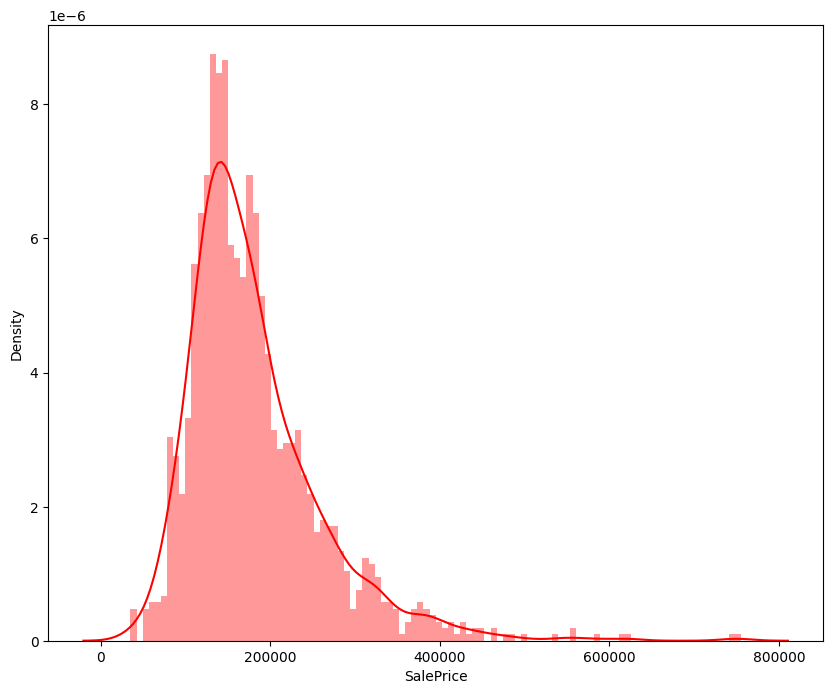

In [34]:
print(dataset_train["SalePrice"].describe)
plt.figure(figsize=(10,8))
sns.distplot(dataset_train["SalePrice"], color="r", bins =100, hist_kws={"alpha": 0.4})

In [35]:
list(set(dataset_train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [38]:
df_num = dataset_train.select_dtypes(include=["float64","int64","bool"])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

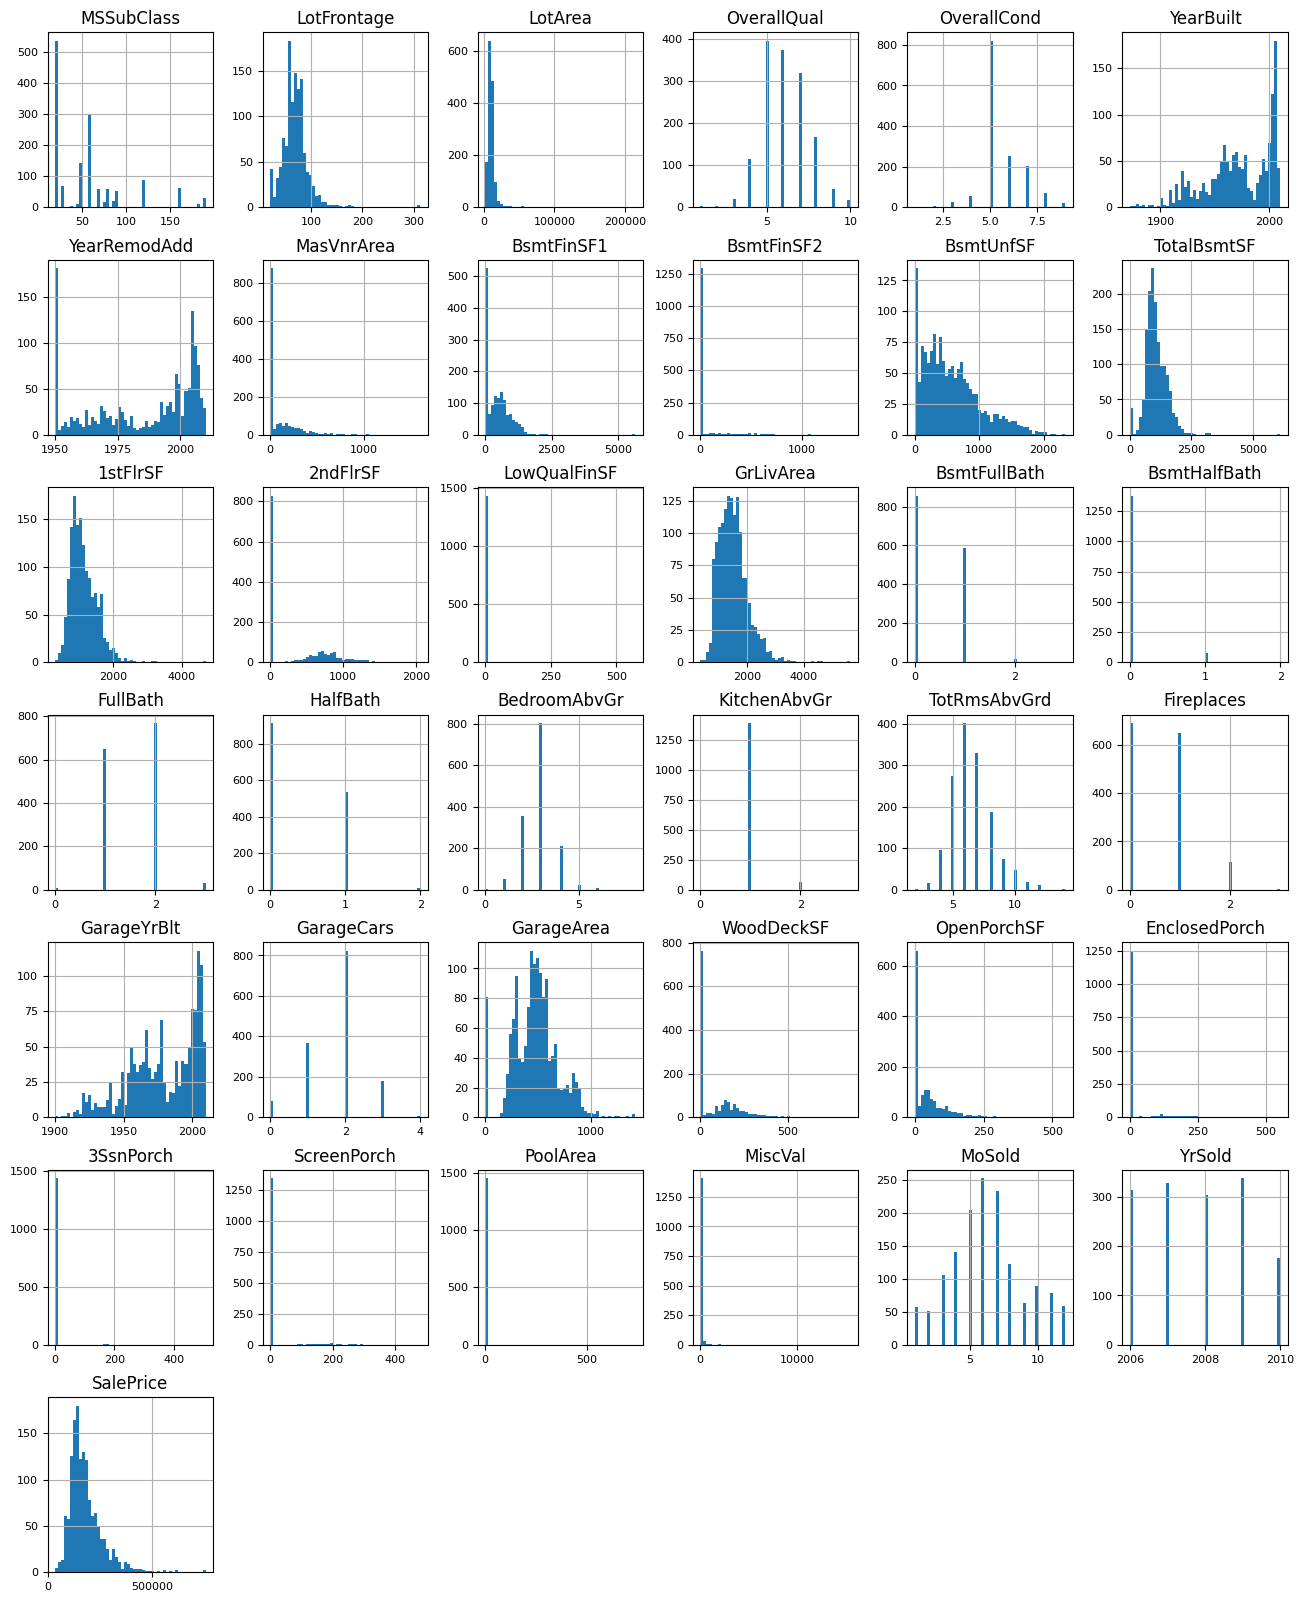

In [40]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

So far , We have information about data slightly. Now lets split data on train - cv - test sets

In [66]:
X= dataset_train
X.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
len(X_train), len(X_test)


(1022, 438)

In [71]:
X_train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950
1126,120,RL,53.0,3684,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,174000


Lets convert the dateset from pd to tf. TF dataset format is high performance data loading forrmat which is helpful when training our model using GPU

In [74]:
label = "SalePrice"
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label= label, task= tfdf.keras.Task.REGRESSION)
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label= label, task = tfdf.keras.Task.REGRESSION)

Lets look at the all models at TF and pick our model

In [76]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [91]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmp_32pjzue as temporary training directory


In [92]:
rf.fit(x=train_dataset)

Reading training dataset...
Training dataset read in 0:00:00.826243. Found 1022 examples.
Training model...
Model trained in 0:00:02.639122
Compiling model...
Model compiled.


Let's visualize it

In [93]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0,max_depth=5)

Thats Looking good. Lets evaluate the model

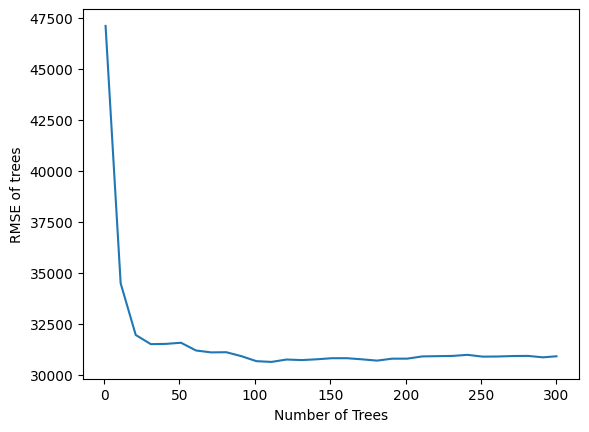

In [94]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.rmse for log in logs])
plt.xlabel("Number of Trees")
plt.ylabel("RMSE of trees")
plt.show()

In [95]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1022, accuracy=None, loss=None, rmse=30908.33427934391, ndcg=None, aucs=None, auuc=None, qini=None)

In [96]:
evaluation = rf.evaluate(x=test_dataset, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}:{value:.4f}")

1/1 [==============================] - 0s 489ms/step - loss: 0.0000e+00 - mse: 677355264.0000
loss:0.0000
mse:677355264.0000


Lets look at variable importance

In [97]:
print(f"Available variable importance :")
for importance in inspector .variable_importances().keys():
  print("\t",importance)

Available variable importance :
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES
	 SUM_SCORE


In [98]:
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]

[("OverallQual" (1; #62), 0.251756063830469),
 ("Neighborhood" (4; #59), 0.2096485001487404),
 ("GrLivArea" (1; #38), 0.2032266619662104),
 ("TotalBsmtSF" (1; #73), 0.13113042971605193),
 ("ExterQual" (4; #22), 0.12618862850334728),
 ("GarageCars" (1; #32), 0.1260821992026031),
 ("GarageArea" (1; #31), 0.12449577548929548),
 ("1stFlrSF" (1; #0), 0.12347660941127982),
 ("BsmtFinSF1" (1; #8), 0.11575410017670523),
 ("LotArea" (1; #47), 0.11402425283467454),
 ("YearBuilt" (1; #76), 0.1130097776444624),
 ("2ndFlrSF" (1; #1), 0.11192163048918323),
 ("KitchenQual" (4; #44), 0.11077836588752155),
 ("BsmtQual" (4; #14), 0.11050606764031466),
 ("Fireplaces" (1; #27), 0.10941990015072289),
 ("GarageFinish" (4; #34), 0.1080054814997674),
 ("YearRemodAdd" (1; #77), 0.10713042959056093),
 ("FullBath" (1; #29), 0.10651780705902537),
 ("BsmtFinType1" (4; #10), 0.10642020983275476),
 ("Exterior2nd" (4; #24), 0.10630332738838873),
 ("Exterior1st" (4; #23), 0.10610449195466667),
 ("OverallCond" (1; #61)

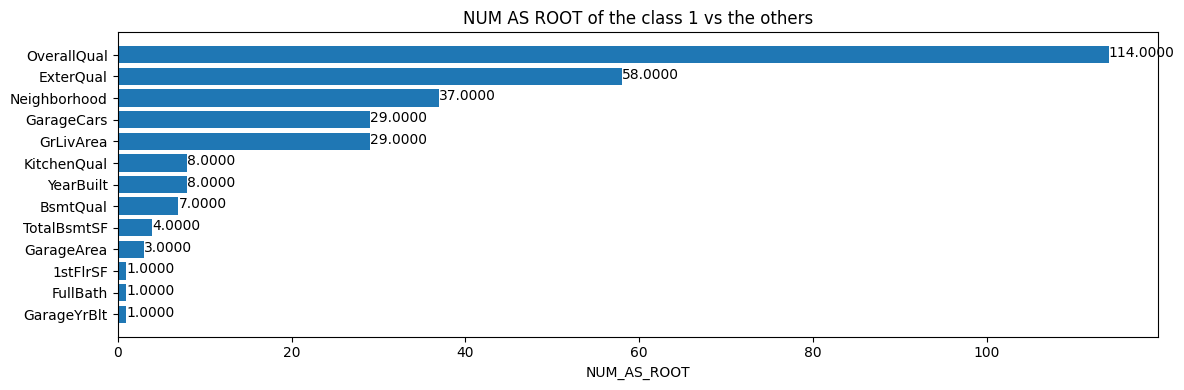

In [99]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

Lets predict on the compeition test data using the model

In [101]:
test_file_path = "/content/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop("Id")

test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task=tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_dataset)
output = pd.DataFrame({"Id":ids,
                       "SalePrice": preds.squeeze()})

output.head()

2/2 [==============================] - 0s 26ms/step


,Id,SalePrice
0,1461,127702.281250
1,1462,153118.859375
2,1463,185964.781250
3,1464,188453.437500
4,1465,200759.093750


In [104]:
sample_submission_df = pd.read_csv("/content/sample_submission.csv")
sample_submission_df["SalePrice"] = rf.predict(test_dataset)
sample_submission_df.to_csv("/content/submission.csv", index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 24ms/step


,Id,SalePrice
0,1461,127702.281250
1,1462,153118.859375
2,1463,185964.781250
3,1464,188453.437500
4,1465,200759.093750
